# 2022/4/11
# 本代码绘制论文version1.3中的fig8
# 内容：分解涡度方程
# 修改：根据吴老师要求把第一行单独列出来

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl

In [2]:
f3 = xr.open_dataset("/home/sun/data/composite-vorticity_equation_decompose.nc")

In [6]:
f3

<xarray.Dataset>
Dimensions:                                          (time: 35, lat: 56, lon: 76)
Coordinates:
  * lon                                              (lon) float32 45.0 ... 1...
  * lat                                              (lat) float32 -15.0 ... ...
  * time                                             (time) float32 1.0 ... 35.0
Data variables: (12/14)
    absolute_vorticity                               (time, lat, lon) float64 ...
    vorticity                                        (time, lat, lon) float64 ...
    d_vor_d_t                                        (time, lat, lon) float64 ...
    v_vor_m_abs_vor_gradient                         (time, lat, lon) float64 ...
    divergent_velocity_laplace_relative_vorticity    (time, lat, lon) float64 ...
    divergent_velocity_laplace_relative_vorticity_x  (time, lat, lon) float64 ...
    ...                                               ...
    stream_velocity_laplace_geostropic_vorticity     (time, lat, lon) float64 ...
    stream_velocity_laplace_relative_vorticity       (time, lat, lon) float64 ...
    stream_velocity_laplace_relative_vorticity_x     (time, lat, lon) float64 ...
    stream_velocity_laplace_relative_vorticity_y     (time, lat, lon) float64 ...
    f_div                                            (time, lat, lon) float64 ...
    v_div_m_abs_vor_gradient                         (time, lat, lon) float64 ...

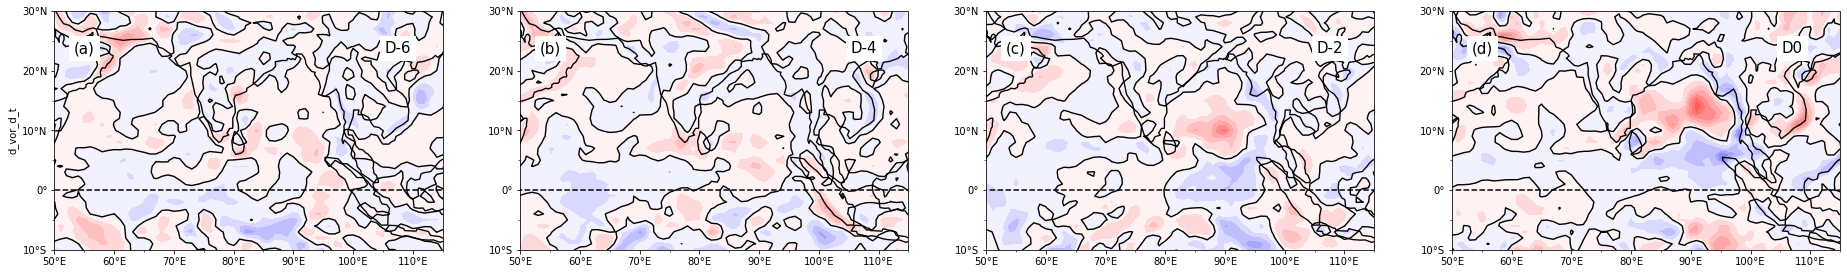

In [9]:
# 绘制涡度随时间变化项
lon_slice  =  slice(45,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  50,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]


date  =  [-6,-4,-2,0]
dates =  [24,26,28,30]

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('seismic', 22)
newcolors = viridis(np.linspace(0.2, 0.8, 20))
newcmp = ListedColormap(newcolors)


props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(32,8))
spec1   =  fig1.add_gridspec(nrows=1,ncols=4)

j = 0 ; row = 0
    
for col in range(4):
    number =  ["a","b","c","d"]
    
    ax = fig1.add_subplot(spec1[row,col],projection=proj)

    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
    ax.set_extent(extent, crs=proj)
    
    ax.plot([40,120],[0,0],'k--')
    im1  =  ax.contour(f3.lon,f3.lat,f3.d_vor_d_t[dates[j]]*-1e5,[0],linewidths=1.4,colors='k')
    im2  =  ax.contourf(f3.lon,f3.lat,f3.d_vor_d_t[dates[j]]*1e5,np.linspace(-1,1,21),cmap=create_ncl_colormap("/home/sun/data/color_rgb/GMT_polar.txt",20),alpha=1,extend='both')
    ax.coastlines(resolution='110m',lw=1.35)
        
    ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=15)
    ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
    if col ==0 :
        ax.set_ylabel("d_vor_d_t")
    
    j += 1

j = 0 ; row = 1

# 绘图

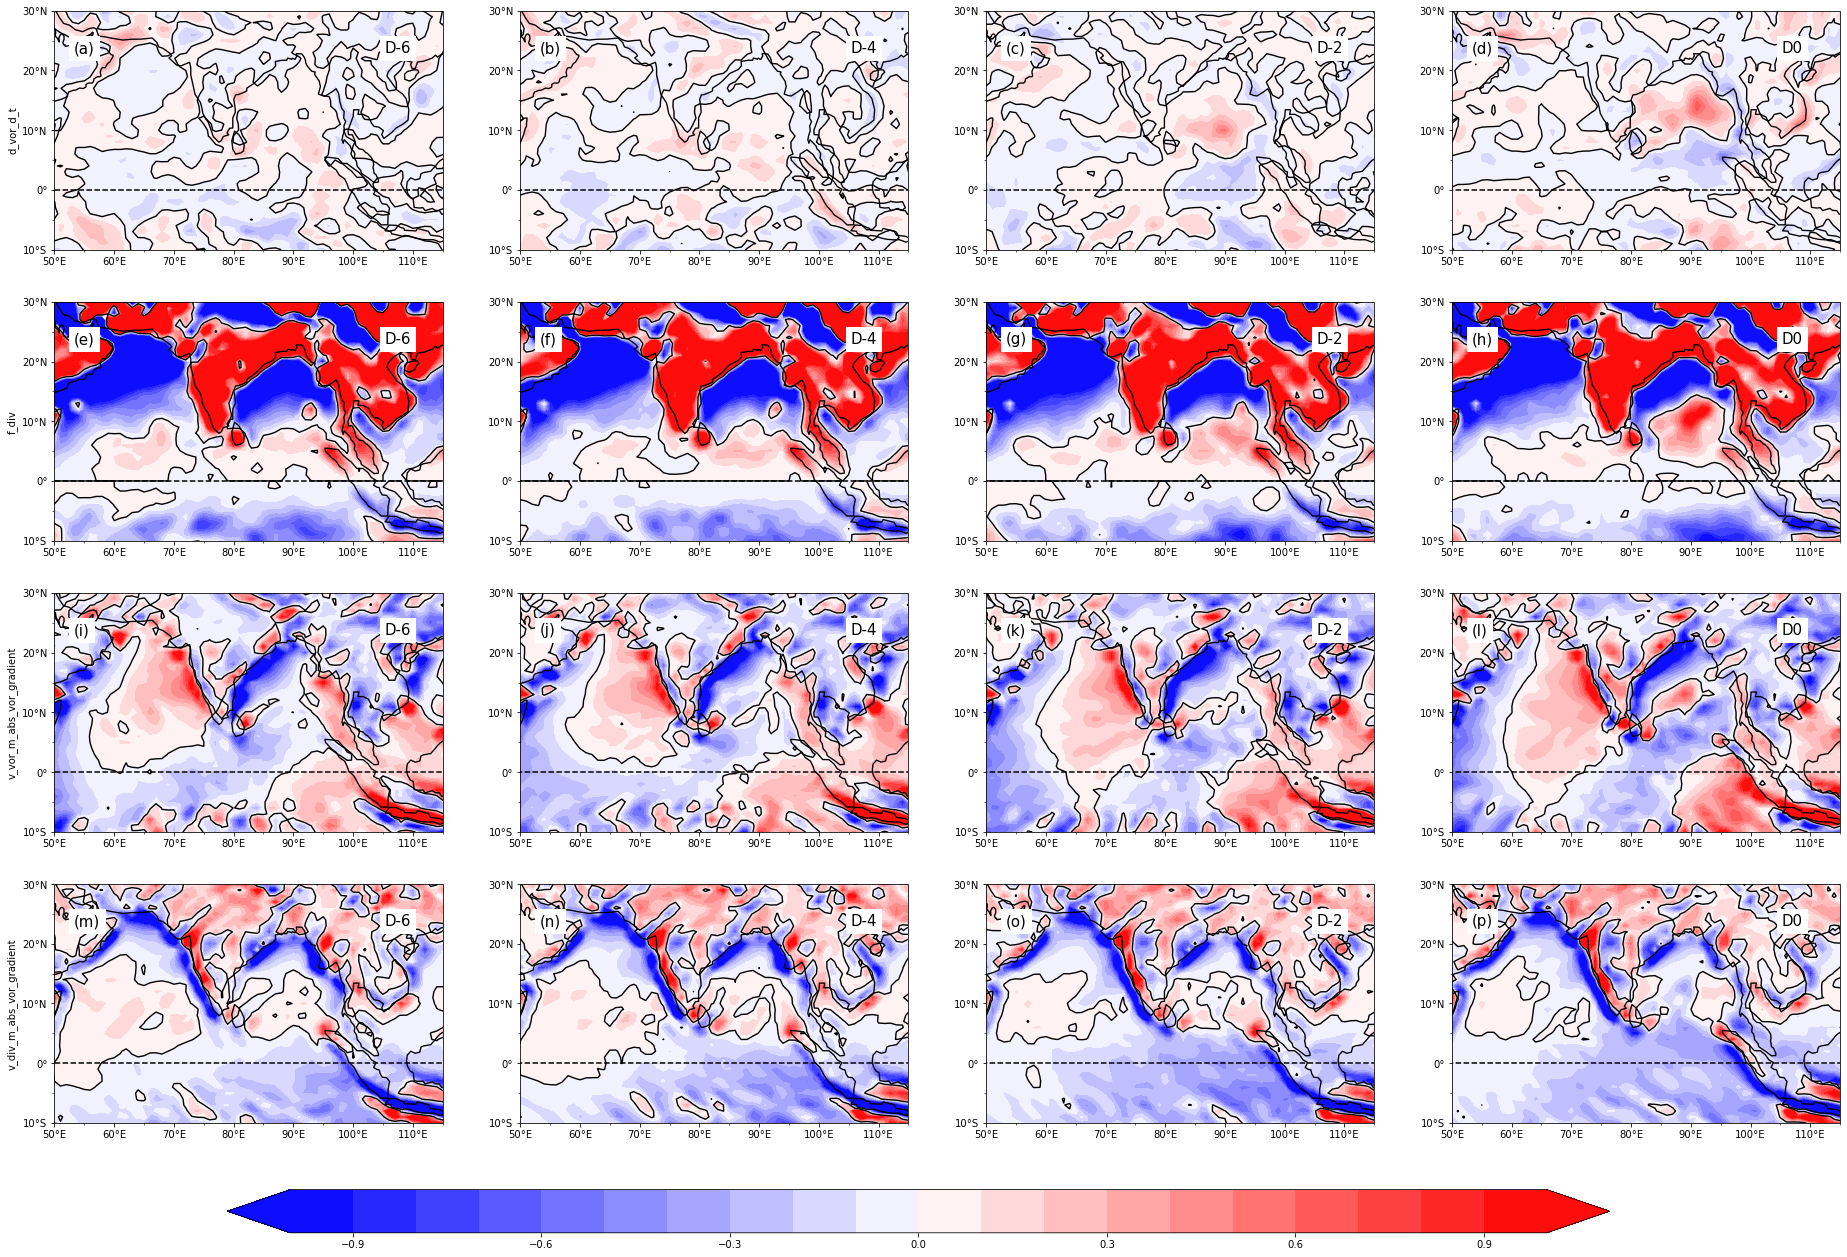

In [13]:


proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(32,20))
spec1   =  fig1.add_gridspec(nrows=4,ncols=4)

j = 0 ; row = 0
    
for col in range(4):
    number =  ["a","b","c","d"]
    
    ax = fig1.add_subplot(spec1[row,col],projection=proj)

    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
    ax.set_extent(extent, crs=proj)
    
    ax.plot([40,120],[0,0],'k--')
    im1  =  ax.contour(f3.lon,f3.lat,f3.d_vor_d_t[dates[j]]*-1e5,[0],linewidths=1.4,colors='k')
    im2  =  ax.contourf(f3.lon,f3.lat,f3.d_vor_d_t[dates[j]]*1e5,np.linspace(-1,1,21),cmap=create_ncl_colormap("/home/sun/data/color_rgb/GMT_polar.txt",20),alpha=1,extend='both')
    ax.coastlines(resolution='110m',lw=1.35)
        
    ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=15)
    ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
    if col ==0 :
        ax.set_ylabel("d_vor_d_t")
    
    j += 1

j = 0 ; row = 1

for col in range(4):
    number =  ["e","f","g","h"]
    ax = fig1.add_subplot(spec1[row,col],projection=proj)
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
    ax.set_extent(extent, crs=proj)
    
    ax.plot([40,120],[0,0],'k--')
    im1  =  ax.contour(f3.lon,f3.lat,f3.f_div[dates[j]]*-1e5,[0],linewidths=1.4,colors='k')
    im2  =  ax.contourf(f3.lon,f3.lat,f3.f_div[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=create_ncl_colormap("/home/sun/data/color_rgb/GMT_polar.txt",20),alpha=1,extend='both')
    
    ax.coastlines(resolution='110m',lw=1.35)
    
    ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=15)
    ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
    if col ==0 :
        ax.set_ylabel("f_div")
    
    j += 1
        
j = 0 ; row = 2
    
for col in range(4):
    number =  ["i","j","k","l"]
    ax = fig1.add_subplot(spec1[row,col],projection=proj)
        
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
    ax.set_extent(extent, crs=proj)
    
    ax.plot([40,120],[0,0],'k--')
    im1  =  ax.contour(f3.lon,f3.lat,f3.v_vor_m_abs_vor_gradient[dates[j]]*-1e5,[0],linewidths=1.4,colors='k')
    im2  =  ax.contourf(f3.lon,f3.lat,f3.v_vor_m_abs_vor_gradient[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=create_ncl_colormap("/home/sun/data/color_rgb/GMT_polar.txt",20),alpha=1,extend='both')
    
    ax.coastlines(resolution='110m',lw=1.35)
        
    ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=15)
    ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
    if col ==0 :
        ax.set_ylabel("v_vor_m_abs_vor_gradient")
    
    j += 1

j = 0 ; row = 3
    
for col in range(4):
    number =  ["m","n","o","p"]
    ax = fig1.add_subplot(spec1[row,col],projection=proj)
        
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
    ax.set_extent(extent, crs=proj)
        
    ax.plot([40,120],[0,0],'k--')
    im1  =  ax.contour(f3.lon,f3.lat,f3.v_div_m_abs_vor_gradient[dates[j]]*-1e5,[0],linewidths=1.4,colors='k')
    im2  =  ax.contourf(f3.lon,f3.lat,f3.v_div_m_abs_vor_gradient[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=create_ncl_colormap("/home/sun/data/color_rgb/GMT_polar.txt",20),alpha=1,extend='both')
        
    ax.coastlines(resolution='110m',lw=1.35)
    
    ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=15)
    ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=15)
    if col ==0 :
        ax.set_ylabel("v_div_m_abs_vor_gradient")
    
    j += 1
        
j = 0 ; row = 3



    
fig1.subplots_adjust(top=0.9) 
cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
fig1.colorbar(im2, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal')

plt.savefig("/home/sun/paint/lunwen/version2.0/fig8_version2.0_vorticity_equation_220411.pdf",dpi=300)

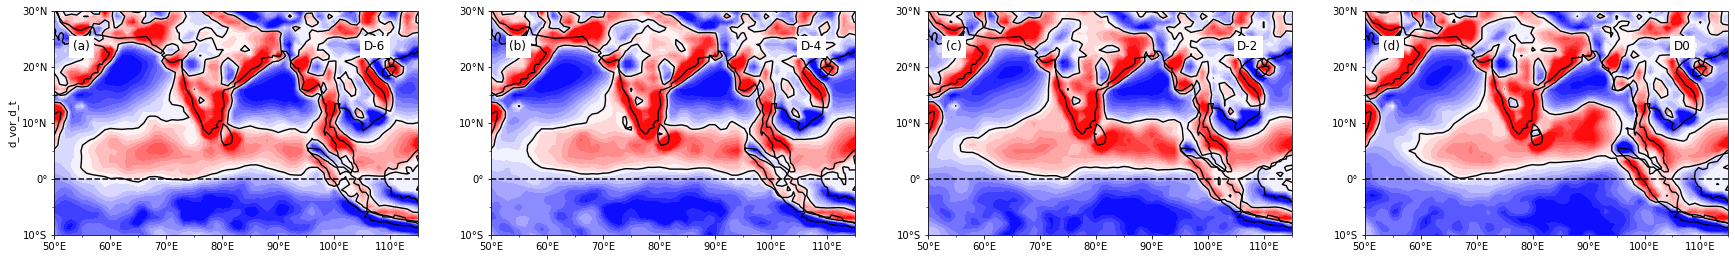

In [13]:
lon_slice  =  slice(45,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  50,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

 
f3  =  ncfile.sel(lon=lon_slice,lat=lat_slice) 

date  =  [-6,-4,-2,0]
dates =  [24,26,28,30]

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('seismic', 22)
newcolors = viridis(np.linspace(0.2, 0.8, 20))
newcmp = ListedColormap(newcolors)

# 框选
verts = [
            [(85., 0.),(95.,0.), (95.,10.),(85., 10.),(0., 0.),],
            [(85., 5.),(95.,5.), (95.,15.),(85., 15.),(0., 0.),],
            [(85., 5.),(95.,5.), (95.,15.),(85., 15.),(0., 0.),],
            [(85., 7.),(95.,7.), (95.,17.),(85., 17.),(0., 0.),],
            [(85., 10.),(95.,10.), (95.,20.),(85., 20.),(0., 0.),],
            [(90., 10.),(100.,10.), (100.,20.),(90., 20.),(0., 0.),],
        ]
codes = [Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY,]

props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(30,22))
spec1   =  fig1.add_gridspec(nrows=4,ncols=4)

j = 0 ; row = 0
    
for col in range(4):
    number =  ["a","b","c","d"]
    
    ax = fig1.add_subplot(spec1[row,col],projection=proj)

    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
    ax.set_extent(extent, crs=proj)
    
    ax.plot([40,120],[0,0],'k--')
    im1  =  ax.contour(f3.lon,f3.lat,f3.vorticity[dates[j]]*-1e5,[0],linewidths=1.4,colors='k')
    im2  =  ax.contourf(f3.lon,f3.lat,f3.vorticity[dates[j]]*1e5,np.linspace(-1,1,21),cmap=create_ncl_colormap("/home/sun/data/color_rgb/GMT_polar.txt",20),alpha=1,extend='both')
    ax.coastlines(resolution='110m',lw=1.35)
        
    ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=12)
    ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=12)
    if col ==0 :
        ax.set_ylabel("d_vor_d_t")
    
    j += 1

j = 0 ; row = 1

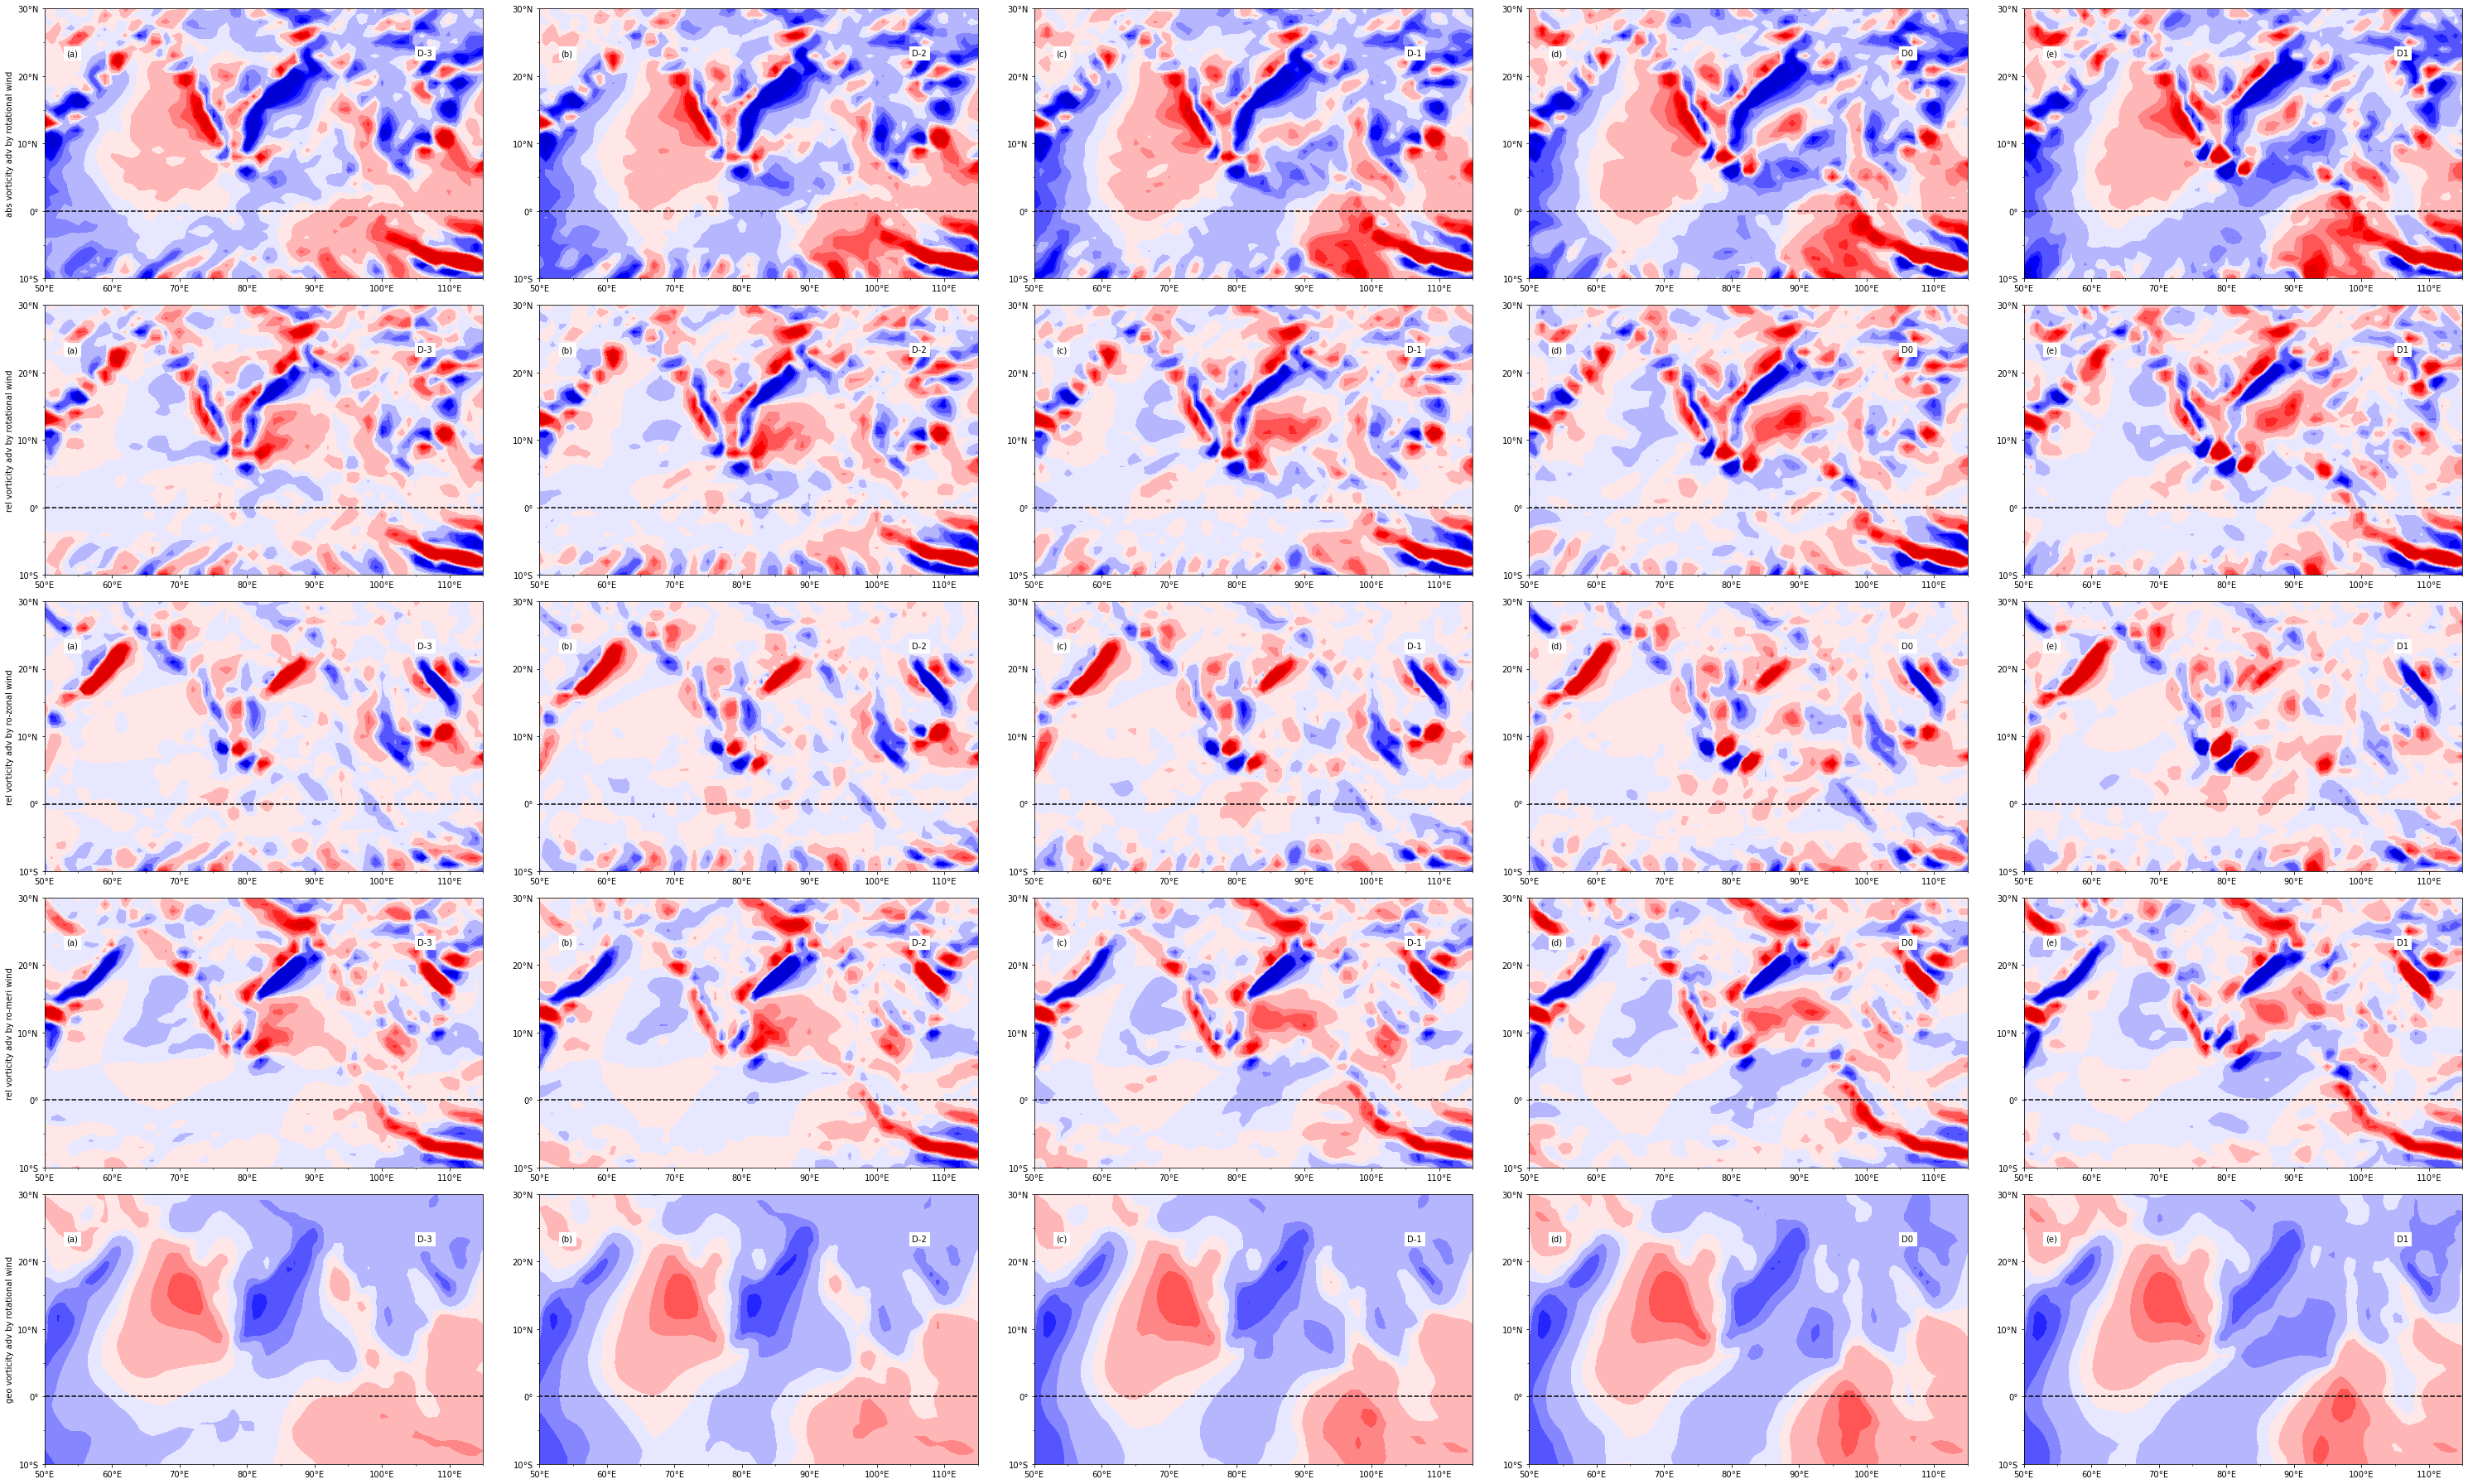

In [4]:
lon_slice  =  slice(45,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  50,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

 
f3  =  ncfile.sel(lon=lon_slice,lat=lat_slice) 

date  =  [-3,-2,-1,0,1]
dates =  [27,28,29,30,31]

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('seismic', 22)
newcolors = viridis(np.linspace(0.2, 0.8, 20))
newcmp = ListedColormap(newcolors)

number =  ["a","b","c","d","e","f","g"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(42,25))
spec1   =  fig1.add_gridspec(nrows=5,ncols=5)

j = 0 ; row = 0
    
for col in range(5):
        
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
        ax.set_extent(extent, crs=proj)
        
        ax.plot([40,120],[0,0],'k--')
        im1  =  ax.contourf(f3.lon,f3.lat,f3.v_vor_m_abs_vor_gradient[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=newcmp,alpha=1,extend='both')
        
        ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=10)
        ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=10)
        if col ==0 :
            ax.set_ylabel("abs vorticity adv by rotational wind")
    
        j += 1

j = 0 ; row = 1
    
for col in range(5):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
        ax.set_extent(extent, crs=proj)
        
        ax.plot([40,120],[0,0],'k--')
        im1  =  ax.contourf(f3.lon,f3.lat,f3.stream_velocity_laplace_relative_vorticity[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=newcmp,alpha=1,extend='both')
        ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=10)
        ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=10)
        if col ==0 :
            ax.set_ylabel("rel vorticity adv by rotational wind")
    
        j += 1
        
j = 0 ; row = 2
    
for col in range(5):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
        ax.set_extent(extent, crs=proj)
        
        ax.plot([40,120],[0,0],'k--')
        im1  =  ax.contourf(f3.lon,f3.lat,f3.stream_velocity_laplace_relative_vorticity_x[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=newcmp,alpha=1,extend='both')
        ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=10)
        ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=10)
        if col ==0 :
            ax.set_ylabel("rel vorticity adv by ro-zonal wind")
    
        j += 1
        
j = 0 ; row = 3
    
for col in range(5):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
        ax.set_extent(extent, crs=proj)
        
        ax.plot([40,120],[0,0],'k--')
        im1  =  ax.contourf(f3.lon,f3.lat,f3.stream_velocity_laplace_relative_vorticity_y[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=newcmp,alpha=1,extend='both')
        ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=10)
        ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=10)
        if col ==0 :
            ax.set_ylabel("rel vorticity adv by ro-meri wind")
    
        j += 1


j = 0 ; row = 4
    

for col in range(5):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
        ax.set_extent(extent, crs=proj)
        
        ax.plot([40,120],[0,0],'k--')
        im1  =  ax.contourf(f3.lon,f3.lat,f3.stream_velocity_laplace_geostropic_vorticity[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=newcmp,alpha=1,extend='both')
        ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=10)
        ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=10)
        if col ==0 :
            ax.set_ylabel("geo vorticity adv by rotational wind")
    
        j += 1
        
j = 0 ; row = 3



    
#fig1.subplots_adjust(top=0.8) 
#cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
#fig1.colorbar(im1, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal')

plt.tight_layout()
plt.savefig("/home/sun/paint/lunwen/version1.3-20220108/fig8_version1.3_vorticity_equation_stream_decompose.pdf",dpi=300)

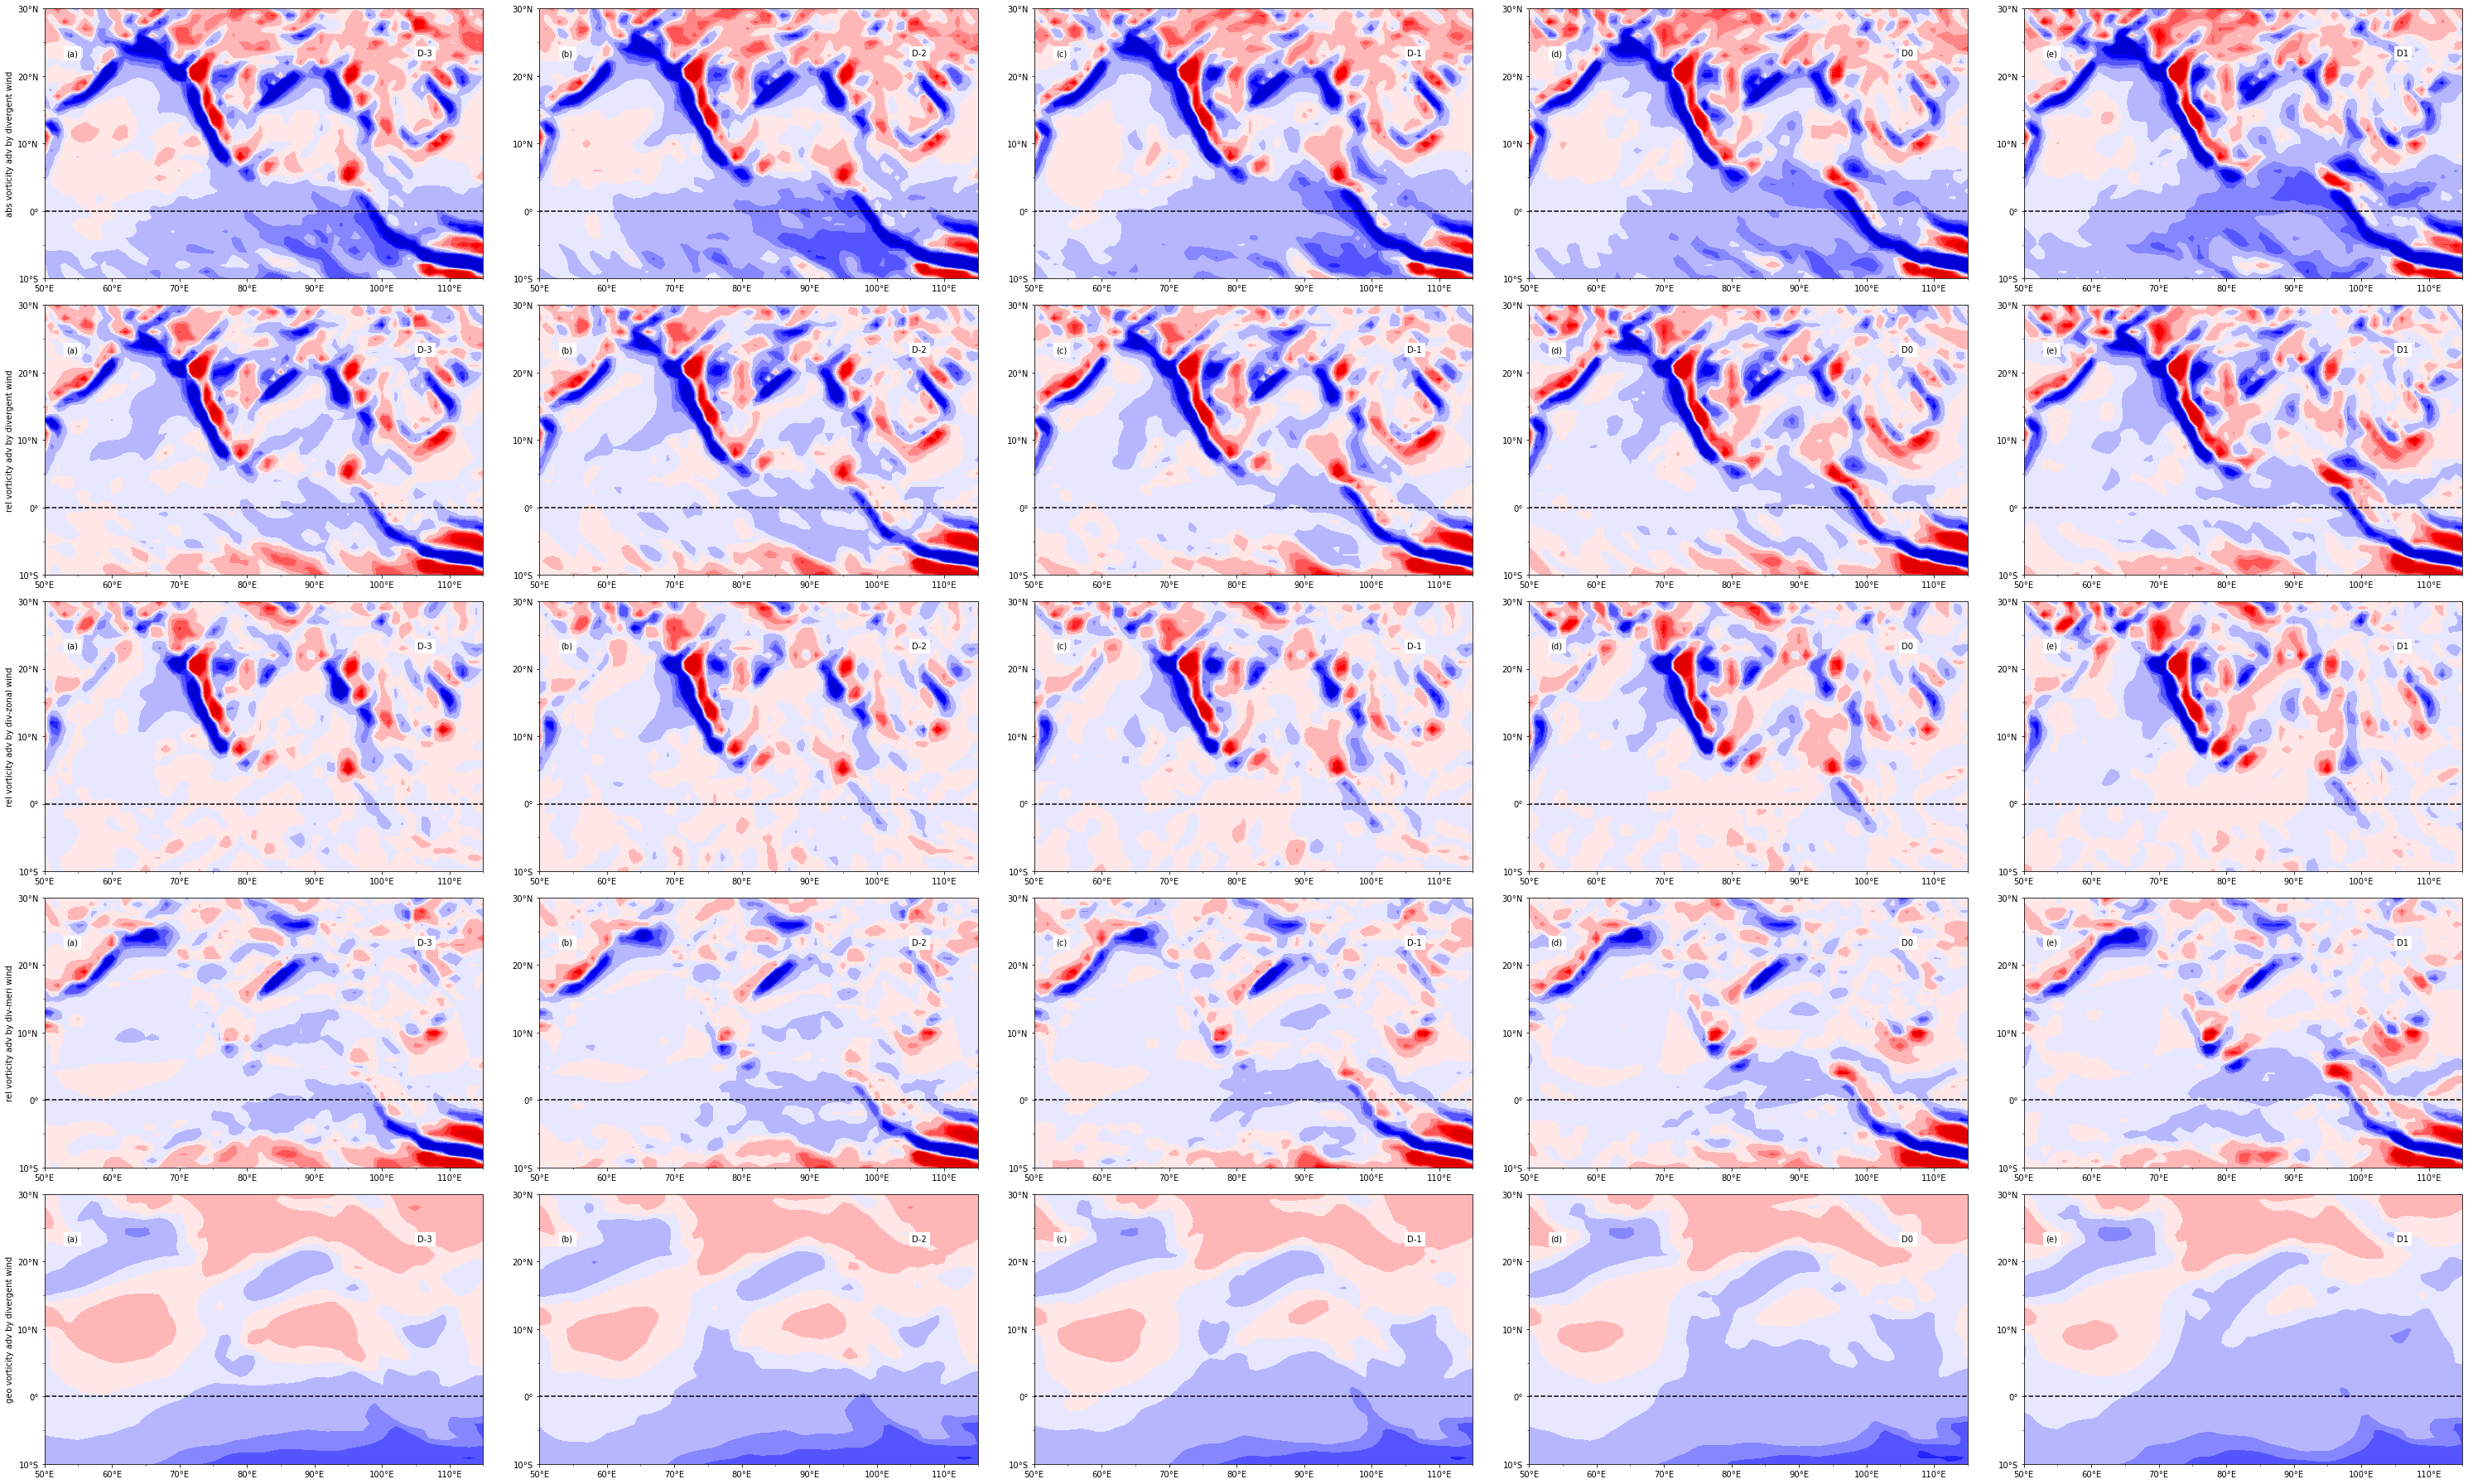

In [5]:
lon_slice  =  slice(45,120)
lat_slice  =  slice(-15,40)

lonmin,lonmax,latmin,latmax  =  50,115,-10,30
extent     =  [lonmin,lonmax,latmin,latmax]

 
f3  =  ncfile.sel(lon=lon_slice,lat=lat_slice) 

date  =  [-3,-2,-1,0,1]
dates =  [27,28,29,30,31]

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('seismic', 22)
newcolors = viridis(np.linspace(0.2, 0.8, 20))
newcmp = ListedColormap(newcolors)

number =  ["a","b","c","d","e","f","g"]
props = dict(boxstyle='square', edgecolor='white', facecolor='white', alpha=1)

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(42,25))
spec1   =  fig1.add_gridspec(nrows=5,ncols=5)

j = 0 ; row = 0
    
for col in range(5):
        
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
        ax.set_extent(extent, crs=proj)
        
        ax.plot([40,120],[0,0],'k--')
        im1  =  ax.contourf(f3.lon,f3.lat,f3.v_div_m_abs_vor_gradient[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=newcmp,alpha=1,extend='both')
        
        ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=10)
        ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=10)
        if col ==0 :
            ax.set_ylabel("abs vorticity adv by divergent wind")
    
        j += 1

j = 0 ; row = 1
    
for col in range(5):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
        ax.set_extent(extent, crs=proj)
        
        ax.plot([40,120],[0,0],'k--')
        im1  =  ax.contourf(f3.lon,f3.lat,f3.divergent_velocity_laplace_relative_vorticity[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=newcmp,alpha=1,extend='both')
        ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=10)
        ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=10)
        if col ==0 :
            ax.set_ylabel("rel vorticity adv by divergent wind")
    
        j += 1
        
j = 0 ; row = 2
    
for col in range(5):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
        ax.set_extent(extent, crs=proj)
        
        ax.plot([40,120],[0,0],'k--')
        im1  =  ax.contourf(f3.lon,f3.lat,f3.divergent_velocity_laplace_relative_vorticity_x[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=newcmp,alpha=1,extend='both')
        ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=10)
        ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=10)
        if col ==0 :
            ax.set_ylabel("rel vorticity adv by div-zonal wind")
    
        j += 1
        
j = 0 ; row = 3
    
for col in range(5):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
        ax.set_extent(extent, crs=proj)
        
        ax.plot([40,120],[0,0],'k--')
        im1  =  ax.contourf(f3.lon,f3.lat,f3.divergent_velocity_laplace_relative_vorticity_y[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=newcmp,alpha=1,extend='both')
        ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=10)
        ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=10)
        if col ==0 :
            ax.set_ylabel("rel vorticity adv by div-meri wind")
    
        j += 1

j = 0 ; row = 4
    
for col in range(5):
        ax = fig1.add_subplot(spec1[row,col],projection=proj)
        ax.coastlines(resolution='110m',lw=1)
        # 设置经纬度刻度.
        set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='medium')
        ax.set_extent(extent, crs=proj)
        
        ax.plot([40,120],[0,0],'k--')
        im1  =  ax.contourf(f3.lon,f3.lat,f3.divergent_velocity_laplace_geostropic_vorticity[dates[j]]*-1e5,np.linspace(-1,1,21),cmap=newcmp,alpha=1,extend='both')
        ax.text(0.85,0.825,"D"+str(date[j]),transform=ax.transAxes,bbox=props,fontsize=10)
        ax.text(0.05,0.825,"("+number[j]+")",transform=ax.transAxes,bbox=props,fontsize=10)
        if col ==0 :
            ax.set_ylabel("geo vorticity adv by divergent wind")
    
        j += 1
        
j = 0 ; row = 3



    
#fig1.subplots_adjust(top=0.8) 
#cbar_ax = fig1.add_axes([0.2, 0.05, 0.6, 0.03]) 
#fig1.colorbar(im1, cax=cbar_ax, shrink=0.1, pad=0.01, orientation='horizontal')
plt.tight_layout()
plt.savefig("/home/sun/paint/lunwen/version1.3-20220108/fig8_version1.3_vorticity_equation_divergent_decompose.pdf",dpi=300)

# 草稿区

In [ ]:
avg_area_terms[2]

In [ ]:
np.max(vorticity)

In [ ]:
np.max(div)

In [ ]:
ff

In [16]:
a  =  1+5j
b  =  1-5j

In [17]:
print(a*b)


(26+0j)
